# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. ¿De qué se trata el conjunto de datos?

El conjunto de datos representa información de creditos hipotecarios efectuados de los cuales algunos un 20% de los prestamos no fueron cancelados con exito. Se registro información de un total de 5960 prestamos, de los cuales se tomaron 12 datos por cada prestamo efectuado.

2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

La variable objetivo es la variable *TARGET*. El valor de la variable puede ser:
  * 1 - El cliente a incumplido en el prestamo.
  * 0 - Prestamo pagado.

3. ¿Qué información (atributos) hay disponible para hacer la predicción?

Los atributos disponibles son:
 * LOAN:     Monto del prestamo solicitado.
 * MORTDUE:  Monto adeudado de la hipoteca.
 * VALUE:    Valor actual de la propiedad.
 * YOJ:      Antigüedad laboral.
 * DEROG:    Riesgo crediticio.
 * DELIQ:    Número de líneas de crédito morosas
 * CLAGE:    Tiempo de la ultima linea de credito.
 * CLNO:     Número de líneas de crédito.
 * DEBTINC:  Relación deuda-ingresos


4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

Consideramos que los atributos determinantes para la predicción son:
  * DEBTINC
  * CLAGE   
  * LOAN    
  * VALUE   
  * DELINQ  
  * NINQ   

In [ ]:
#Separo el conjunto de datos en entrenamiento y test

In [ ]:
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
sgdc = SGDClassifier(random_state=0) 
model = sgdc.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
target_names = ['loan repaid','client_default']
print(classification_report(model.predict(X_test),
                      y_test,
                      target_names=target_names))

                precision    recall  f1-score   support

   loan repaid       0.95      0.89      0.92       331
client_default       0.40      0.57      0.47        40

      accuracy                           0.86       371
     macro avg       0.67      0.73      0.69       371
  weighted avg       0.89      0.86      0.87       371



In [ ]:
import numpy as np
import itertools
import matplotlib.pylab as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
cm = confusion_matrix(y_test,y_test_pred)

Normalized confusion matrix
[[0.9456869  0.0543131 ]
 [0.60344828 0.39655172]]


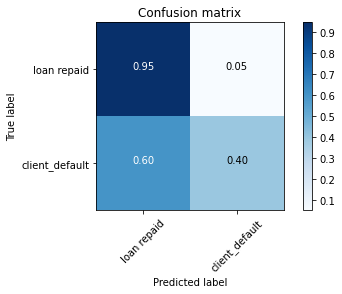

In [ ]:
plot_confusion_matrix(cm=cm, 
                      classes=['loan repaid','client_default'],
                      normalize = True)

In [ ]:
print('Precision  ',precision_score(y_test, y_test_pred))
print('F1         ',f1_score(y_test, y_test_pred))
print('Recall     ',recall_score(y_test, y_test_pred))
print('Accuracy   ',accuracy_score(y_test, y_test_pred))

Precision   0.575
F1          0.46938775510204084
Recall      0.39655172413793105
Accuracy    0.8598382749326146


### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
param_grid = [{'loss': ['hinge', 
                        'log',
                        'modified_huber',
                        'squared_hinge',
                        'perceptron'],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'alpha':[0.0001,0.001,0.01,0.1]}]

grid_search_sgdc = GridSearchCV(sgdc, param_grid=param_grid,cv=5,return_train_score=True)
grid_search_sgdc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=0,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1],
                          'loss': ['hinge', 'log', 'modified_huber',
                                   'squared_hinge', 'perceptron'],
             

In [ ]:
resultados = pd.DataFrame(grid_search_sgdc.cv_results_)
resultados[['param_alpha',
            'param_loss', 
            'param_penalty',
            'params', 
            'mean_test_score', 
            'std_test_score', 
            'rank_test_score']].sort_values(by= ['rank_test_score'])

,param_alpha,param_loss,param_penalty,params,mean_test_score,std_test_score,rank_test_score
32,0.01,hinge,elasticnet,"{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'e...",0.871208,0.008888,1
18,0.001,log,l2,"{'alpha': 0.001, 'loss': 'log', 'penalty': 'l2'}",0.869199,0.011605,2
17,0.001,hinge,elasticnet,"{'alpha': 0.001, 'loss': 'hinge', 'penalty': '...",0.869192,0.010662,3
15,0.001,hinge,l2,"{'alpha': 0.001, 'loss': 'hinge', 'penalty': '...",0.868521,0.009143,4
16,0.001,hinge,l1,"{'alpha': 0.001, 'loss': 'hinge', 'penalty': '...",0.868516,0.008695,5
33,0.01,log,l2,"{'alpha': 0.01, 'loss': 'log', 'penalty': 'l2'}",0.868512,0.009762,6
35,0.01,log,elasticnet,"{'alpha': 0.01, 'loss': 'log', 'penalty': 'ela...",0.868512,0.009762,6
30,0.01,hinge,l2,"{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l2'}",0.868512,0.005994,6
39,0.01,squared_hinge,l2,"{'alpha': 0.01, 'loss': 'squared_hinge', 'pena...",0.867165,0.008086,9
19,0.001,log,l1,"{'alpha': 0.001, 'loss': 'log', 'penalty': 'l1'}",0.866494,0.013542,10


In [ ]:
grid_search_sgdc.best_params_

{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'elasticnet'}

In [ ]:
optimised_sgdc = grid_search_sgdc.best_estimator_
y_opt_pred = optimised_sgdc.predict(X_test)

In [ ]:
optimised_sgdc.classes_

array([0, 1])

Normalized confusion matrix
[[1.         0.        ]
 [0.74137931 0.25862069]]


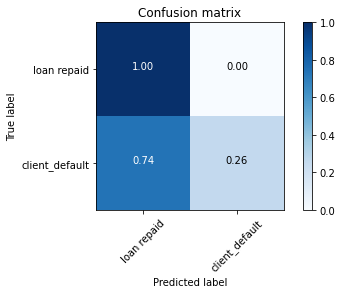

In [ ]:
cm = confusion_matrix(y_test,y_opt_pred)
plot_confusion_matrix(cm=cm, 
                      classes=['loan repaid','client_default'],
                      normalize = True)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['loan repaid','client_default']
print(classification_report(y_opt_pred,
                      y_test,
                      target_names=target_names))

                precision    recall  f1-score   support

   loan repaid       1.00      0.88      0.94       356
client_default       0.26      1.00      0.41        15

      accuracy                           0.88       371
     macro avg       0.63      0.94      0.67       371
  weighted avg       0.97      0.88      0.91       371



In [ ]:
print('Precision',precision_score(y_test, y_opt_pred))
print('F1',f1_score(y_test, y_opt_pred))
print('Recall',recall_score(y_test, y_opt_pred))
print('Accuracy',accuracy_score(y_test, y_opt_pred))

Precision 1.0
F1 0.4109589041095891
Recall 0.25862068965517243
Accuracy 0.8840970350404312


## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [ ]:
from sklearn.tree import DecisionTreeClassifier

X, y = dataset.iloc[:, 1:], dataset.TARGET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = DecisionTreeClassifier(random_state=0)

In [ ]:
model = clf.fit(X_train,y_train)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
target_names = ['loan repaid','client_default']
print(classification_report(model.predict(X_test),
                      y_test,
                      target_names=target_names))

                precision    recall  f1-score   support

   loan repaid       0.93      0.93      0.93       311
client_default       0.64      0.62      0.63        60

      accuracy                           0.88       371
     macro avg       0.78      0.77      0.78       371
  weighted avg       0.88      0.88      0.88       371



In [ ]:
cm = confusion_matrix(y_test,y_test_pred)

Normalized confusion matrix
[[0.92651757 0.07348243]
 [0.36206897 0.63793103]]


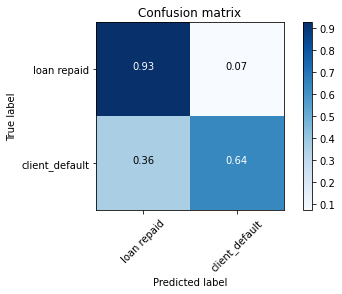

In [ ]:
plot_confusion_matrix(cm=cm, 
                      classes=['loan repaid','client_default'],
                      normalize = True)

In [ ]:
print('Precision',precision_score(y_test, y_test_pred))
print('F1',f1_score(y_test, y_test_pred))
print('Recall',recall_score(y_test, y_test_pred))
print('Accuracy',accuracy_score(y_test, y_test_pred))

Precision 0.6166666666666667
F1 0.6271186440677966
Recall 0.6379310344827587
Accuracy 0.8814016172506739


### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth':  np.arange(5, 12),
    'min_samples_leaf' : np.arange(1, 10),
    'max_features': [None, 'auto', 'sqrt', 'log2'],
}
model = DecisionTreeClassifier(random_state=0)

grid_search_clf = GridSearchCV(model, param_grid=param_grid,cv=5,return_train_score=True)
grid_search_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10,

In [ ]:
resultados = pd.DataFrame(grid_search_clf.cv_results_)
resultados[['param_criterion',
            'param_max_depth', 
            'param_min_samples_leaf',
            'params', 
            'mean_test_score', 
            'std_test_score', 
            'rank_test_score']].sort_values(by= ['rank_test_score'])

,param_criterion,param_max_depth,param_min_samples_leaf,params,mean_test_score,std_test_score,rank_test_score
189,gini,10,1,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.884712,0.012340,1
198,gini,10,1,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.884712,0.012340,1
207,gini,10,1,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.884712,0.012340,1
215,gini,10,9,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.883358,0.013142,4
197,gini,10,9,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.883358,0.013142,4
...,...,...,...,...,...,...,...
400,entropy,9,5,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.847627,0.024845,500
403,entropy,9,8,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.847604,0.016294,501
401,entropy,9,6,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.844924,0.025380,502
474,entropy,11,7,"{'criterion': 'entropy', 'max_depth': 11, 'max...",0.842229,0.023284,503


In [ ]:
grid_search_sgdc.best_params_

{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'elasticnet'}

In [ ]:
optimised_clf = grid_search_clf.best_estimator_
y_opt_pred = optimised_clf.predict(X_test)

In [ ]:
optimised_clf.classes_

array([0, 1])

Normalized confusion matrix
[[0.94888179 0.05111821]
 [0.27586207 0.72413793]]


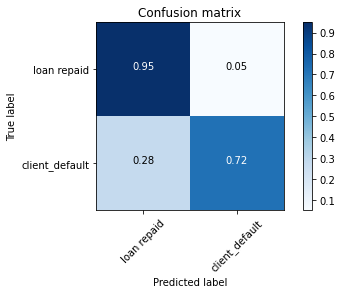

In [ ]:
cm = confusion_matrix(y_test,y_opt_pred)
plot_confusion_matrix(cm=cm, 
                      classes=['loan repaid','client_default'],
                      normalize = True)

In [ ]:
print('Precision',precision_score(y_test, y_opt_pred))
print('F1',f1_score(y_test, y_opt_pred))
print('Recall',recall_score(y_test, y_opt_pred))
print('Accuracy',accuracy_score(y_test, y_opt_pred))

Precision 0.7241379310344828
F1 0.7241379310344829
Recall 0.7241379310344828
Accuracy 0.9137466307277629
